<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
 <p></p>
 <br/>
		<div align=center>
		    <size=6>
			    <br />
Practical Assignment 2- part 1
              <font color=blue size=6>
            	<br/>
              Adversarial Search
			</font>
    <br/>
    <br/>
 </div>
<hr/>
Artifical Intelligence - Dr. GholamReza GhassemSani
</font>
  <p></p>
 <br/>
Sharif University of Technology
<p></p>
Spring 2022


<br/>
<br/>
<font size=4 color=red>
 </font>
                <br/>
    </div>

**Due date: 15/2/1401 (at 11:59pm)**<br>
You are free to collaborate but solutions must be written up individually.
Collaborators **must** be acknowledged.<br>
Submissions with more than 100 hours delay will not be graded.<br>Submissions with less than
50 hours delay will be penalized by the following rule:<br>
**Penalized mark = M * (100 – D) / 100** <br>
Where M = the mark achieved from your solution and D is number of hours passed the
deadline. Submissions with 50 < X ≤ 100 hours delay will be penalized by P.M. = M * 0.5.<br>
Submit your answers on quera.

student_number = "98100497"
Name = "Mohammad Ali"
Last_Name = "Olama"

# [Connect four](https://en.wikipedia.org/wiki/Connect_Four)
Connect four is a two-player connection board game, in which each player chooses a color and in turn drops the token of that color into a seven-column six-row grid. Eech token when dropped occupies the lowest available empty cell.we are going to implement the connect four game. You are supposed to play with a rational agent (RA) that chooses its moves based on an adverserial search. As shown in the figure below, in the first move, RA drops its token into cell (0,3). Note that in your first move, the token must be dropped into one of the following cells: [(0, 0), (0, 1), (0, 2), (1, 3), (0, 4), (0, 5), (0, 6)]. <br>Therefore, in each move, you just need to identify the column into which you are going to drop your token as an input to the code given below. The code will then automatically choose the right x (i.e., the first available cell).<br>The objective of each player is to be the first one that forms a horizontal, vertical, or diagonal line of **four** tokens of the selected color.

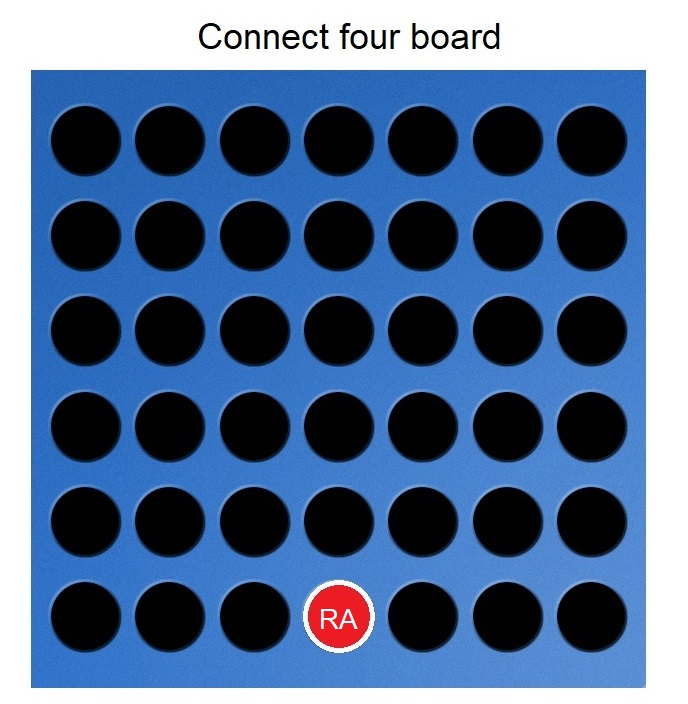

In [21]:
from math import inf
import sys, os
import time

You are playing as the max player : `YOU` is 1 <br>
RA is playing as the min palyer : `RA` is -1





In [22]:
YOU = 1
RA = -1

def show(state):
    d = {0: " ", 1: "+", -1: "-"}
    state = list(map(lambda x: [d[y] for y in x], reversed(state)))
    return "\n".join(map(str, state))

board = [[0 for _ in range(7)] for _ in range(6)]
board[0][3] = RA # assume this is the first move RA does
print(show(board))

[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', ' ']


# 1) Complete the  **#to do** parts in the code below and play the game.<br>
Your codes will be evaluated based on how well your RA works

In [23]:
def evaluation(state):
    # evaluation of the board.
    if is_wining(state, RA):
        score = -1
    elif is_wining(state, YOU):
        score = 1
    else:
        score = 0
    return score

def avaliable_cells(state):# which moves are valid?
    # to do
    cells = [] #this list should include tuples of valid x's and y's
    for j in range(0, 7):
        bool = True
        for i in range(0, 6):
            if bool:
                if state[i][j] == 0:
                    cells.append((i, j))
                    bool = False
                    break


    return cells

def is_wining(state, player):
    for i in range(0, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i][j + 1] == player and state[i][j + 2] == player and \
                    state[i][j + 3] == player:
                # print("pos 1")
                return True

    for i in range(0, 3):
        for j in range(0, 7):
            if state[i][j] == player and state[i + 1][j] == player and state[i + 2][j] == player and \
                    state[i + 3][j] == player:
                # print("pos2")
                return True

    for i in range(0, 3):
        for j in range(0, 4):
            if state[i][j] == player and state[i + 1][j + 1] == player and state[i + 2][j + 2] == player and \
                    state[i + 3][j + 3] == player:
                # print("pos3")
                return True

    for i in range(3, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i - 1][j + 1] == player and state[i - 2][j + 2] == player and \
                    state[i - 3][j + 3] == player:
                # print("pos 4")
                return True
    # to do
    # if the state is is wining for player(RA or YOU) return true
    return False
    pass


def game_over(state):
    """Check if the game is over """
    return is_wining(state, YOU) or is_wining(state, RA)

def minimax(state, depth, player):

    """return list of [best_move_row, best_move_col, best_score]
    initial best scores for min player is inf and for max player is -inf
    """
    if player == RA:
        best = [-1, -1, inf] 
    else:
        best = [-1, -1, -inf]

    if depth == 0 or game_over(state):
        score = evaluation(state)

        return [-1, -1, score]

    if player == YOU:
        value = - inf
        for cell in avaliable_cells(state):
            state[cell[0]][cell[1]] = player
            b = minimax(state, depth - 1, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] > value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
        return best
    else:
        value = inf
        for cell in avaliable_cells(state):
            state[cell[0]][cell[1]] = RA
            b = minimax(state, depth - 1, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] < value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
        return best

def your_move(state):
    
    isTurn = True
    
    while isTurn:
        
        print("Human move")
        moves = dict(map(reversed, avaliable_cells(state)))
        cols = list(moves.keys())
        x = int(input("Enter your move: ")) # just choose a column
        if x in cols:
            y = moves[x]
            state[y][x] = YOU
            print(show(state))
            isTurn = False
        else:
            print("wrong move")
            break
    

def RA_move(state):
    depth = 5
    #to do 
    """the best move for RA ?? dont forget to update the state"""
    best = minimax(state, depth, RA)
    state[best[0]][best[1]] = RA
    print("RA move")
    print(show(state)) 




def main():
    timer=0
    counter =0
    while not is_wining(board, RA) and not is_wining(board, YOU):
        your_move(board)

        if len(avaliable_cells(board)) == 0 :
          break
        start = time. time()
        RA_move(board)
        end = time. time()
        print(counter)
        if counter<3:
            timer +=end - start
        if counter == 3:
            print("time is:" , timer)
        counter+=1
        print ("RA decision time :", end - start)

    if is_wining(board, RA):
        print("RA wins haha!!")
    elif is_wining(board, YOU):
        print("you win, wow!")
    else:
        print("It's a Draw. No one wins")


if __name__ == '__main__':
    main()

Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
['-', ' ', ' ', '-', ' ', ' ', '+']
0
RA decision time : 0.5085330009460449
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
['-', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '-', ' ', ' ', '+']
1
RA decision time :

# 2) Plot The Results 
Plot a graph with the depth of the Minmax search tree (e.g. 2, 3, etc.) and the elapsed time (i.e., for the first 3 moves of RA) as x and y coordinates, respectively.<br>  Note that the total time would be equal to 1st move time + 2nd move time + 3rd move time.


با انجام بازی در عمق های مختلف(از 2 تا 7) ، زمان هایی بدست آمده است که آن ها را به صورت هاردکد شده در این قسمت قرار دادم و رسم کردم.( در هر عمق، مجموع زمان برای 4 تصمیم گیری اول ایجنت را درنظر گرفتم.)

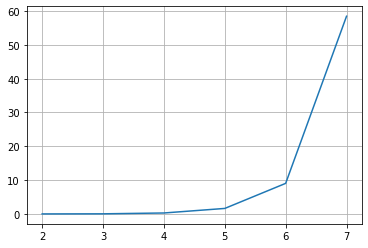

In [24]:
import matplotlib.pyplot as plt

times = [0.00900125503540039 , 0.0375828742980957 , 0.2833230495452881 , 1.6304965019226074 , 9.042816638946533 , 58.45622444152832]
xs = [2,3,4,5,6 , 7]

plt.plot(xs , times)
plt.grid(b=True)

 البته با ران کردن کد زیر نیز میتوانید به صورت پویا 6 بازی را هرکدام با یک عمق مشخص و تا چهار حرکت اول ایجنت انجام دهید و سپس نتیجه را مشاهده کنید :

**********************************************************************
new game with depth= 2  is started.

[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', ' ']
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
['-', ' ', ' ', '-', ' ', ' ', '+']
0
RA decision time : 0.003992557525634766
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', 

RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
['-', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '-', ' ', ' ', '+']
1
RA decision time : 0.449169397354126
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '-']
[' ', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '-', ' ', ' ', '+']
2
RA decision time : 0.3875725269317627
Human move
Enter your move: 5
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', '-']
[' ', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', ' ', ' ', ' ', '+']
['-', ' ', ' ', '

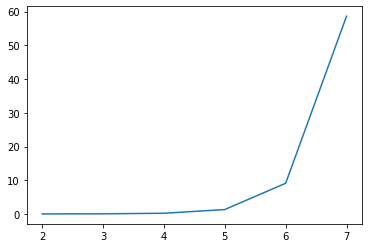

In [26]:
from math import inf
import sys, os
import time

YOU = 1
RA = -1

def show(state):
    d = {0: " ", 1: "+", -1: "-"}
    state = list(map(lambda x: [d[y] for y in x], reversed(state)))
    return "\n".join(map(str, state))

board = [[0 for _ in range(7)] for _ in range(6)]
board[0][3] = RA # assume this is the first move RA does
# print(show(board))

def evaluation(state):
    # evaluation of the board.
    if is_wining(state, RA):
        score = -1
    elif is_wining(state, YOU):
        score = 1
    else:
        score = 0
    return score

def recreate_board(board):
    for i in range(0,6):
        for j in range(0,7):
            board[i][j] = 0
#     board = [[0 for _ in range(7)] for _ in range(6)]
    board[0][3] = RA # assume this is the first move RA does
    print(show(board))

def avaliable_cells(state):# which moves are valid?
    # to do
    cells = [] #this list should include tuples of valid x's and y's
    for j in range(0, 7):
        bool = True
        for i in range(0, 6):
            if bool:
                if state[i][j] == 0:
                    cells.append((i, j))
                    bool = False
                    break


    return cells

def is_wining(state, player):
    for i in range(0, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i][j + 1] == player and state[i][j + 2] == player and \
                    state[i][j + 3] == player:
                # print("pos 1")
                return True

    for i in range(0, 3):
        for j in range(0, 7):
            if state[i][j] == player and state[i + 1][j] == player and state[i + 2][j] == player and \
                    state[i + 3][j] == player:
                # print("pos2")
                return True

    for i in range(0, 3):
        for j in range(0, 4):
            if state[i][j] == player and state[i + 1][j + 1] == player and state[i + 2][j + 2] == player and \
                    state[i + 3][j + 3] == player:
                # print("pos3")
                return True

    for i in range(3, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i - 1][j + 1] == player and state[i - 2][j + 2] == player and \
                    state[i - 3][j + 3] == player:
                # print("pos 4")
                return True
    # to do
    # if the state is is wining for player(RA or YOU) return true
    return False
    pass


def game_over(state):
    """Check if the game is over """
    return is_wining(state, YOU) or is_wining(state, RA)

def minimax(state, depth, player):

    """return list of [best_move_row, best_move_col, best_score]
    initial best scores for min player is inf and for max player is -inf
    """
    if player == RA:
        best = [-1, -1, inf] 
    else:
        best = [-1, -1, -inf]

    if depth == 0 or game_over(state):
        score = evaluation(state)

        return [-1, -1, score]

    if player == YOU:
        value = - inf
        for cell in avaliable_cells(state):
            state[cell[0]][cell[1]] = player
            b = minimax(state, depth - 1, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] > value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
        return best
    else:
        value = inf
        for cell in avaliable_cells(state):
            state[cell[0]][cell[1]] = RA
            b = minimax(state, depth - 1, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] < value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
        return best

def your_move(state):
    
    isTurn = True
    
    while isTurn:
        
        print("Human move")
        moves = dict(map(reversed, avaliable_cells(state)))
        cols = list(moves.keys())
        x = int(input("Enter your move: ")) # just choose a column
        if x in cols:
            y = moves[x]
            state[y][x] = YOU
            print(show(state))
            isTurn = False
        else:
            print("wrong move")
            break
    

def RA_move(state , depth):
#     depth = 5
    #to do 
    """the best move for RA ?? dont forget to update the state"""
    best = minimax(state, depth, RA)
    state[best[0]][best[1]] = RA
    print("RA move")
    print(show(state)) 




def main():
    times =[]
    for i in range(2,8):
        depth = i
        print(70 * "*")
        print("new game with depth=" , i , " is started.")
        print()
        counter =0
        timer=0
        recreate_board(board)
        while not is_wining(board, RA) and not is_wining(board, YOU) and counter<4:
            your_move(board)
            if len(avaliable_cells(board)) == 0 :
              break
            start = time. time()
            RA_move(board , depth)
            end = time. time()
            print(counter)
            if counter<3:
                timer += end - start
            if counter == 3:
                print("time is:" , timer)
            counter+=1
            print ("RA decision time :", end - start)

        if is_wining(board, RA):
            print("RA wins haha!!")
        elif is_wining(board, YOU):
            print("you win, wow!")
        else:
            print("It's a Draw. No one wins")
        
        times.append(timer)
        
        
    print("results: " , times)
    xs = [2,3,4,5,6,7]
    plt.plot(xs , times)


if __name__ == '__main__':
    main()

# 3) Try to optimize the above algorithm using the alpha-beta prunning technique, an improved evaluation function, etc.<br>Explain your optimized codes, replay the game, and plot the results.

با اجرای کد زیر، میتوانید با نسخه بهینه شده، بازی کاملی را تا انتها انجام دهید.
بهینگی در دو قسمت انجام شده است.
اول تابع محاسبه امتیاز هر استیت تغییر کرده است. حالا، بین حالت هایی که برد یک بازیکن نیستند نیز از نظر امتیازی تفاوت قائل میشویم. به ازای دسته های 3تایی و یا دسته هایی دوتایی که بین آنها فضای خالی برای قراردادن مهره باشد امتیاز درنظر میگیریم. همچنین برای هر مهره در ستون وسط(که مهمترین ستون بازی است) نیز مقدار کمی امتیاز درنظر میگیریم. برای بازیکن اول امتیاز های مثبت و برای هوش مصنوعی امتیاز های منفی لحاظ میکنیم و امتیاز کلی یک وضعیت بازی، مجموع تمام امتیاز های مثبت و منفی در آن استیت خواهد بود.
همچنین برای وضعیت های برد در عمق های متفاوت نیز تفاوت قائل میشویم. اینک امتیاز یک حالت برد، ضریبی از عمقی است که آن حالت را پیدا کرده ایم. هر چه زودتر یک استیت برد پیدا شود، امتیاز بیشتری(از نظر قدرمطلقی) خواهد گرفت.

بهینگی دوم نیز مربوط به زمان اجرای کد است. با استفاده از الگوریتم هرس آلفا بتا، زمان اجرای کد در عمق 6 ( و اعماق بیشتر) کاهش می یابد. توجه داشته باشید که چون تابع محاسبه امتیاز پیچیده تری داریم، در عمق های کمتر، زمان محاسبه امتیاز ها به کمتر شدن زمان توسط هرس الفا بتا غلبه میکند و در اعماق پایین زمان اجرای بیشتری مشاهده میکنیم.
برای مثال ، در یک بار آزمایش دو الگوریتم در عمق 7، مجموع زمان 4 تصمیم گیری اول الگوریتم اول 58 ثانیه ، و مجموع زمان 4 تصمیم گیری اول در الگوریتم بهینه ، 32 ثانیه بود که نشان از کاهش محسوس زمان اجرا در اعماق بالاتر دارد.

چنانچه گفته شد با اجرای سلول زیر ، یک بازی کامل تا انتها انجام میشود.


In [27]:
import math
from math import inf
import sys, os
import time


YOU = 1
RA = -1
EMPTY = 0

def show(state):
    d = {0: " ", 1: "+", -1: "-"}
    state = list(map(lambda x: [d[y] for y in x], reversed(state)))
    return "\n".join(map(str, state))

board = [[0 for _ in range(7)] for _ in range(6)]
board[0][3] = RA # assume this is the first move RA does
print(show(board))


def evaluate_window(window):
    score = 0

    if window.count(YOU) == 4:
        score += 1000
    elif window.count(YOU) == 3 and window.count(EMPTY) == 1:
        score += 200
    elif window.count(YOU) == 2 and window.count(EMPTY) == 2:
        score += 15
    elif window.count(RA) == 4:
        score -= 1000
    elif window.count(RA) == 3 and window.count(EMPTY) == 1:
        score -= 200
    elif window.count(RA) == 2 and window.count(EMPTY) == 2:
        score -= 15

    return score


def evaluation(state, player):
    # evaluation of the board.
    if is_wining(state, RA):
        score = -100
    elif is_wining(state, YOU):
        score = 100
    else:
        score = 0
        center_array = [state[r][3] for r in range(6)]
        a = center_array.count(YOU)
        b = center_array.count(RA)
        score += (a * YOU * 2) + (b * RA * 2)

        ## Score Horizontal

        for i in range(0, 6):
            row_score = 0
            row_array = [state[i][r] for r in range(7)]
            # row_array = state[i][:]
#             print(row_array)
            for j in range(0, 4):
                window = row_array[j: j + 4]
                row_score += evaluate_window(window)
            score += row_score
#             print("row:" , i ," score is: " , row_score)

#         print("***********************************************************")
        ## Score Vertical
        for j in range(0, 7):
            col_score = 0
            col_array =  [state[r][j] for r in range(6)]
#             print(col_array)
            for i in range(0, 3):
                window = col_array[i: i + 4]
                col_score += evaluate_window(window)
            score += col_score
#             print("row:", j, " score is: ", col_score)

        for i in range(0, 3):
            for j in range(0, 4):
                window = []
                for k in range(0, 4):
                    window.append(state[i + k][j + k])
                score += evaluate_window(window)

    for i in range(3, 6):
        for j in range(0, 4):
            window = []
            for k in range(0, 4):
                window.append(state[i - k][j + k])
                score += evaluate_window(window)
    return score

def avaliable_cells(state):# which moves are valid?
    # to do
    cells = [] #this list should include tuples of valid x's and y's
    for j in range(0, 7):
        bool = True
        for i in range(0, 6):
            if bool:
                if state[i][j] == 0:
                    cells.append((i, j))
                    bool = False
                    break


    return cells

def is_wining(state, player):
    for i in range(0, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i][j + 1] == player and state[i][j + 2] == player and \
                    state[i][j + 3] == player:
                # print("pos 1")
                return True

    for i in range(0, 3):
        for j in range(0, 7):
            if state[i][j] == player and state[i + 1][j] == player and state[i + 2][j] == player and \
                    state[i + 3][j] == player:
                # print("pos2")
                return True

    for i in range(0, 3):
        for j in range(0, 4):
            if state[i][j] == player and state[i + 1][j + 1] == player and state[i + 2][j + 2] == player and \
                    state[i + 3][j + 3] == player:
                # print("pos3")
                return True

    for i in range(3, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i - 1][j + 1] == player and state[i - 2][j + 2] == player and \
                    state[i - 3][j + 3] == player:
                # print("pos 4")
                return True
    # to do
    # if the state is is wining for player(RA or YOU) return true
    return False
    pass


def game_over(state):
    """Check if the game is over """
    return is_wining(state, YOU) or is_wining(state, RA)

def minimax(state, depth, alpha, beta, player):
    """return list of [best_move_row, best_move_col, best_score]
    initial best scores for min player is inf and for max player is -inf
    """
    if player == RA:
        best = [-1, -1, inf]
    else:
        best = [-1, -1, -inf]

    if depth == 0 or game_over(state):
        if is_wining(state , RA):
            return [-1, -1, (depth+1) * -100000000]
        elif is_wining(state , YOU):
            return [-1, -1, (depth+1) * +100000000]
        else:
            score = evaluation(state, player)
            return [-1, -1, score]

    t = avaliable_cells(state)
    # print(t)

    if player == YOU:
        value = - math.inf
        for cell in t:
            state[cell[0]][cell[1]] = player
            b = minimax(state, depth - 1, alpha, beta, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] > value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
            alpha = max(alpha, value)
            if alpha >= beta:
                break

        return best
    else:
        value = math.inf
        for cell in t:
            state[cell[0]][cell[1]] = RA
            b = minimax(state, depth - 1, alpha, beta, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] < value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
            beta = min(beta, value)
            if beta <= alpha:
                break

        return best
    
    

def your_move(state):
    
    isTurn = True
    
    while isTurn:
        
        print("Human move")
        moves = dict(map(reversed, avaliable_cells(state)))
        cols = list(moves.keys())
        x = int(input("Enter your move: ")) # just choose a column
        if x in cols:
            y = moves[x]
            state[y][x] = YOU
            print(show(state))
            isTurn = False
        else:
            print("wrong move")
            break
    

def RA_move(state):
    depth = 5
    #to do 
    """the best move for RA ?? dont forget to update the state"""
    best = minimax(state, depth,-inf , +inf , RA)
    state[best[0]][best[1]] = RA
    print("RA move: " , best)
    print(show(state)) 




def main():
    timer=0
    counter =0
    while not is_wining(board, RA) and not is_wining(board, YOU):
        your_move(board)

        if len(avaliable_cells(board)) == 0 :
          break
        start = time. time()
        RA_move(board)
        end = time. time()
        print(counter)
        if counter<3:
            timer +=end - start
        if counter == 3:
            print("time is:" , timer)
        counter+=1
        print ("RA decision time :", end - start)

    if is_wining(board, RA):
        print("RA wins haha!!")
    elif is_wining(board, YOU):
        print("you win, wow!")
    else:
        print("It's a Draw. No one wins")


if __name__ == '__main__':
    main()

[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', ' ']
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', '+']
RA move:  [0, 2, -217]
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', '-', '-', ' ', ' ', '+']
0
RA decision time : 0.42369723320007324
Human move
Enter your move: 1
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', '+', '-', '-', ' ', ' ', '+']
RA move:  [1

مطابق قسمت ب، یک قسمت جدا برای رسم نمودار نیز قرار گرفته است. در این حالت 6 بار بازی اجرا میشود و هر بار تا 4 حرکت اول ایجنت جلو میرود و مجموع زمان ذخیره میشود و در انتها نیز این زمان ها را بر حسب عمق رسم میکنیم.

[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', ' ']
**********************************************************************
new game with depth= 2  is started.
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', '-', '-', ' ', ' ', '+']
0
RA decision time : 0.011965274810791016
Human move
Enter your move: 1
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', '

RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', '+', ' ', ' ', ' ']
[' ', ' ', '-', '-', ' ', ' ', ' ']
[' ', '+', '-', '-', ' ', ' ', '+']
2
RA decision time : 0.6750979423522949
Human move
Enter your move: 2
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', '+', '+', ' ', ' ', ' ']
[' ', ' ', '-', '-', ' ', ' ', ' ']
[' ', '+', '-', '-', ' ', ' ', '+']
RA move
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', '+', '+', ' ', ' ', ' ']
[' ', ' ', '-', '-', ' ', ' ', ' ']
[' ', '+', '-', '-', '-', ' ', '+']
3
time is: 1.8575518131256104
RA decision time : 0.38745808601379395
It's a Draw. No one wins
**********************************************************************
new game with depth= 6  is started.
Human move
Enter your move: 6
[' ', ' ', ' ', ' ', ' ', ' ', ' ']

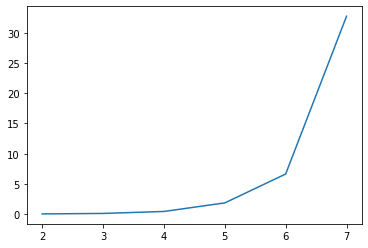

In [31]:
import math
from math import inf
import sys, os
import time


YOU = 1
RA = -1
EMPTY = 0

def show(state):
    d = {0: " ", 1: "+", -1: "-"}
    state = list(map(lambda x: [d[y] for y in x], reversed(state)))
    return "\n".join(map(str, state))

board = [[0 for _ in range(7)] for _ in range(6)]
board[0][3] = RA # assume this is the first move RA does
print(show(board))


def recreate_board(board):
    for i in range(0,6):
        for j in range(0,7):
            board[i][j] = 0
#     board = [[0 for _ in range(7)] for _ in range(6)]
    board[0][3] = RA # assume this is the first move RA does

def evaluate_window(window):
    score = 0

    if window.count(YOU) == 4:
        score += 1000
    elif window.count(YOU) == 3 and window.count(EMPTY) == 1:
        score += 200
    elif window.count(YOU) == 2 and window.count(EMPTY) == 2:
        score += 15
    elif window.count(RA) == 4:
        score -= 1000
    elif window.count(RA) == 3 and window.count(EMPTY) == 1:
        score -= 200
    elif window.count(RA) == 2 and window.count(EMPTY) == 2:
        score -= 15

    return score


def evaluation(state, player):
    # evaluation of the board.
    if is_wining(state, RA):
        score = -100
    elif is_wining(state, YOU):
        score = 100
    else:
        score = 0
        center_array = [state[r][3] for r in range(6)]
        a = center_array.count(YOU)
        b = center_array.count(RA)
        score += (a * YOU * 2) + (b * RA * 2)

        ## Score Horizontal

        for i in range(0, 6):
            row_score = 0
            row_array = [state[i][r] for r in range(7)]
            # row_array = state[i][:]
#             print(row_array)
            for j in range(0, 4):
                window = row_array[j: j + 4]
                row_score += evaluate_window(window)
            score += row_score
#             print("row:" , i ," score is: " , row_score)

#         print("***********************************************************")
        ## Score Vertical
        for j in range(0, 7):
            col_score = 0
            col_array =  [state[r][j] for r in range(6)]
#             print(col_array)
            for i in range(0, 3):
                window = col_array[i: i + 4]
                col_score += evaluate_window(window)
            score += col_score
#             print("row:", j, " score is: ", col_score)

        for i in range(0, 3):
            for j in range(0, 4):
                window = []
                for k in range(0, 4):
                    window.append(state[i + k][j + k])
                score += evaluate_window(window)

    for i in range(3, 6):
        for j in range(0, 4):
            window = []
            for k in range(0, 4):
                window.append(state[i - k][j + k])
                score += evaluate_window(window)
    return score

def avaliable_cells(state):# which moves are valid?
    # to do
    cells = [] #this list should include tuples of valid x's and y's
    for j in range(0, 7):
        bool = True
        for i in range(0, 6):
            if bool:
                if state[i][j] == 0:
                    cells.append((i, j))
                    bool = False
                    break


    return cells

def is_wining(state, player):
    for i in range(0, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i][j + 1] == player and state[i][j + 2] == player and \
                    state[i][j + 3] == player:
                # print("pos 1")
                return True

    for i in range(0, 3):
        for j in range(0, 7):
            if state[i][j] == player and state[i + 1][j] == player and state[i + 2][j] == player and \
                    state[i + 3][j] == player:
                # print("pos2")
                return True

    for i in range(0, 3):
        for j in range(0, 4):
            if state[i][j] == player and state[i + 1][j + 1] == player and state[i + 2][j + 2] == player and \
                    state[i + 3][j + 3] == player:
                # print("pos3")
                return True

    for i in range(3, 6):
        for j in range(0, 4):
            if state[i][j] == player and state[i - 1][j + 1] == player and state[i - 2][j + 2] == player and \
                    state[i - 3][j + 3] == player:
                # print("pos 4")
                return True
    # to do
    # if the state is is wining for player(RA or YOU) return true
    return False
    pass


def game_over(state):
    """Check if the game is over """
    return is_wining(state, YOU) or is_wining(state, RA)

def minimax(state, depth, alpha, beta, player):
    """return list of [best_move_row, best_move_col, best_score]
    initial best scores for min player is inf and for max player is -inf
    """
    if player == RA:
        best = [-1, -1, inf]
    else:
        best = [-1, -1, -inf]

    if depth == 0 or game_over(state):
        if is_wining(state , RA):
            return [-1, -1, (depth+1) * -100000000]
        elif is_wining(state , YOU):
            return [-1, -1, (depth+1) * +100000000]
        else:
            score = evaluation(state, player)
            return [-1, -1, score]

    t = avaliable_cells(state)
    # print(t)

    if player == YOU:
        value = - math.inf
        for cell in t:
            state[cell[0]][cell[1]] = player
            b = minimax(state, depth - 1, alpha, beta, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] > value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
            alpha = max(alpha, value)
            if alpha >= beta:
                break

        return best
    else:
        value = math.inf
        for cell in t:
            state[cell[0]][cell[1]] = RA
            b = minimax(state, depth - 1, alpha, beta, player * (-1))
            state[cell[0]][cell[1]] = 0
            if b[2] < value:
                value = b[2]
                best = [cell[0], cell[1], b[2]]
            beta = min(beta, value)
            if beta <= alpha:
                break

        return best
    
    

def your_move(state):
    
    isTurn = True
    
    while isTurn:
        
        print("Human move")
        moves = dict(map(reversed, avaliable_cells(state)))
        cols = list(moves.keys())
        x = int(input("Enter your move: ")) # just choose a column
        if x in cols:
            y = moves[x]
            state[y][x] = YOU
            print(show(state))
            isTurn = False
        else:
            print("wrong move")
            break
    

def RA_move(state , depth):
#     depth = 5
    #to do 
    """the best move for RA ?? dont forget to update the state"""
    best = minimax(state, depth,-inf , +inf ,  RA)
    state[best[0]][best[1]] = RA
    print("RA move")
    print(show(state)) 




def main():
    times =[]
    for i in range(2,8):
        depth = i
        print(70 * "*")
        print("new game with depth=" , i , " is started.")
        counter =0
        timer=0
        recreate_board(board)
        while not is_wining(board, RA) and not is_wining(board, YOU) and counter<4:
            your_move(board)
            if len(avaliable_cells(board)) == 0 :
              break
            start = time. time()
            RA_move(board , depth)
            end = time. time()
            print(counter)
            if counter<3:
                timer += end - start
            if counter == 3:
                print("time is:" , timer)
            counter+=1
            print ("RA decision time :", end - start)

        if is_wining(board, RA):
            print("RA wins haha!!")
        elif is_wining(board, YOU):
            print("you win, wow!")
        else:
            print("It's a Draw. No one wins")
        
        times.append(timer)
        
        
    print("results: " , times)
    xs = [2,3,4,5,6,7]
    plt.plot(xs , times)


if __name__ == '__main__':
    main()